# Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the stock market dataset

In [3]:
df = pd.read_csv('stock_data.csv')

# Extract the 'Close' prices from the dataset

In [4]:
data = df.filter(['Close']).values

# Scale the data

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets

In [6]:
train_data = scaled_data[:int(len(data) * 0.8)]
test_data = scaled_data[int(len(data) * 0.8):]

# Define a function to create the dataset

In [7]:
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the time step value

In [8]:
time_steps = 60

# Create the training and testing datasets

In [9]:
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape the input data to be 3D for LSTM

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the Stacked LSTM model

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
148/148 [==============================] - 11s 37ms/step - loss: 0.0022
Epoch 2/10
148/148 [==============================] - 5s 35ms/step - loss: 4.0265e-04
Epoch 3/10
148/148 [==============================] - 5s 36ms/step - loss: 3.9707e-04
Epoch 4/10
148/148 [==============================] - 6s 37ms/step - loss: 3.0799e-04
Epoch 5/10
148/148 [==============================] - 5s 34ms/step - loss: 2.8968e-04
Epoch 6/10
148/148 [==============================] - 5s 35ms/step - loss: 2.7842e-04
Epoch 7/10
148/148 [==============================] - 5s 35ms/step - loss: 2.3584e-04
Epoch 8/10
148/148 [==============================] - 6s 40ms/step - loss: 2.2277e-04
Epoch 9/10
148/148 [==============================] - 6s 40ms/step - loss: 2.3465e-04
Epoch 10/10
148/148 [==============================] - 5s 34ms/step - loss: 1.9741e-04


# Make predictions on the testing data

In [13]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 16ms/step


# valuate the model

In [14]:
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 45.903920801379186


# Plot the predicted and actual prices

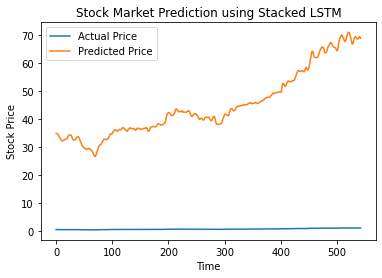

In [15]:
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction using Stacked LSTM')
plt.legend()
plt.show()